STA 141B Project - A comparison of an NBA player's on court preformance against the expectations of their contract

1. Introduction
2. Data Acquisiton 
3. Data Process 
4. Approach
5. Data Analysis 
5b. General statistics 
5c. Data Analysis real 
6. Reports + visualization
7. Dicussion 
8. 

1. #### Introduction

The National Basketball Association (NBA) is the premiere American basketball league comprised of 30 teams from the United States and Canada. A player will receive larger compensation in their contract based on an assessment of skill and experience. As spectators, we generally assume that a larger salary indicates stronger aptitude and strength. However, this viewpoint heavily hinges on the individual while basketball wins depend upon the team as a whole. Such an assumption may not be a holistic signifier of player success but only on the individual level. The study examines the relationship between player statistics and salary for the 2023 to 2024 season to evaluate the validity of our assumption by taking into account team contribution metrics. Using visualizations of our findings, it will identify patterns and anomalies, and assess the implications of the results on team and the NBA's economics. By doing so, we may take an approach that aligns closer with the group-oriented objectives of professional basketball teams.

2. #### Data acquisiton
The data set, composed of 554 players, contains four metrics that measure team contribution per player: RAPTOR, LEBRON, Player Efficiency Rating, and Win Share. We selected team contribution metrics rather than individual ones to standardize indicators of performance across positions; as individual statistics such as blocks and rebounds may vary based on one's role on the court, they are not a fair overall evaluation of player accomplishment. 
* RAPTOR is a measure of points that a player contributed per 100 possessions relative to a league average player. It takes Offensive and Defensive ratings. 
* LEBRON calculates the change in score when the player is on the court, stabilized to account for player position and variance. It takes Total, Offensive, and Defensive ratings. 
* Player Efficiency Rating (PER) measures a player's productivity per minute relative to a league average of 15.00, adjusted for pace. 
* Win Share assigns a number to a player based on their contributions to team wins during the season. 

To access general statistics about certain players, we will utilize a public API package that pulls from the NBA website (https://github.com/swar/nba_api?tab=readme-ov-file). We will also extract team salary cap, the official maximum salary per player (https://www.spotrac.com/nba/cap/), and salary information per player for the 2023 to 2024 season. 

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# This code will allow us to find the cap space for the 24 season for all NBA teams
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 

# URL of the page
url = 'https://www.spotrac.com/nba/cap/'

# Send a GET request to the page
response = requests.get(url)

# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Grab Table
table = soup.find('table', {'class': 'datatable'})

# Pandas dataframe conversion
df = pd.read_html(str(table))[0]

print(df)

    Rank                    Team   Win%  PlayersSigned  PlayersAvg Age     Total Cap    Cap Space* 1st ApronSpace 2nd ApronSpace Active CapAll Active CapTop 3     Dead Cap
0      1               Utah Jazz  0.431             15            23.8  $131,557,411    $4,463,589    $39,773,098            NaN  $123,347,474     $66,152,629   $8,209,937
1      2         Detroit Pistons  0.185             14            24.6  $135,598,371      $422,629    $35,247,629            NaN   $83,803,488     $42,031,943  $51,794,883
2      3           Orlando Magic  0.576             15            24.3  $139,355,784   $-3,334,784            NaN            NaN  $130,964,229     $47,450,000          NaN
3      4       San Antonio Spurs  0.212             15            22.7  $142,928,288   $-6,907,288    $29,416,585            NaN   $94,551,623     $44,260,680  $46,356,959
4      5       Charlotte Hornets  0.258             15            24.5  $143,055,717   $-7,034,717    $34,913,527            NaN   $97,074,9

As mentioned previously, we can also use the a public API called nba_api, which allows us to pull from the [NBA Website](https://www.nba.com/), which has publically available data on every player. Let's pull up up information on the current reigning MVP Joel Embiid of the philadelphia 76ers for his career statistics, current season statistics, and information on his contract with the 76ers currently. 

In [4]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playercareerstats, playergamelog

# Find player ID
player_dict = players.get_players()
embiid = [player for player in player_dict if player['full_name'] == 'Joel Embiid'][0]
embiid_id = embiid['id']

# Fetch career statistics
career_stats = playercareerstats.PlayerCareerStats(player_id=embiid_id)
career_df = career_stats.get_data_frames()[0]

# Fetch current season statistics
current_season_stats = playergamelog.PlayerGameLog(player_id=embiid_id, season='2023')
current_season_df = current_season_stats.get_data_frames()[0]

print("Joel Embiid's Career Statistics:")
print(career_df)

# Print current season statistics
print("\nJoel Embiid's Current Season Statistics:")
print(current_season_df)

Joel Embiid's Career Statistics:
   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS     MIN  FGM   FGA  FG_PCT  FG3M  FG3A  FG3_PCT  FTM  FTA  FT_PCT  OREB  DREB  REB  AST  STL  BLK  TOV   PF   PTS
0     203954   2016-17        00  1610612755               PHI        23.0  31  31   786.0  200   429   0.466    36    98    0.367  191  244   0.783    61   182  243   66   27   76  117  112   627
1     203954   2017-18        00  1610612755               PHI        24.0  63  63  1912.0  510  1056   0.483    66   214    0.308  359  467   0.769   143   547  690  199   40  111  234  209  1445
2     203954   2018-19        00  1610612755               PHI        25.0  64  64  2154.0  580  1199   0.484    79   263    0.300  522  649   0.804   160   711  871  234   46  122  226  211  1761
3     203954   2019-20        00  1610612755               PHI        26.0  51  51  1506.0  382   801   0.477    57   172    0.331  351  435   0.807   141   452  593  152   45   6

In [176]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')

# Find the data table - you need to identify the correct table or data structure
# This is just an example; you'll need to adjust it based on the actual structure
table = soup.find('table', {'id': 'player-contracts'})

# Extract data and convert it to a DataFrame
# This part depends heavily on the structure of the table and the data you need
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Player", "Team", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print(df2)


              Player Team      2023-24      2024-25      2025-26  \
2      Stephen Curry  GSW  $51,915,615  $55,761,216  $59,606,817   
3       Kevin Durant  PHO  $47,649,433  $51,179,021  $54,708,609   
4       Nikola Jokić  DEN  $47,607,350  $51,415,938  $55,224,526   
5        Joel Embiid  PHI  $47,607,350  $51,415,938  $55,224,526   
6       LeBron James  LAL  $47,607,350  $51,415,938  $47,607,350   
..               ...  ...          ...          ...          ...   
549       Taze Moore  POR      $64,343      $64,343         None   
552  Tosan Evbuomwan  MEM     $135,120      $64,343         None   
553     Trey Jemison  MEM      $64,343         None         None   
554     Matthew Hurt  MEM      $64,343         None         None   
555       Pete Nance  CLE      $64,343      $64,343         None   

          2026-27       2027-28       2028-29 2029-30  
2    $167,283,648          None          None    None  
3    $153,537,063          None          None    None  
4     $59,033,1

5. Data Analysis
One of the general correlation approach we can use to see if how much money teams are spending affects how often they win is to compare their yearly cap space with their win percentage. 

                            OLS Regression Results                            
Dep. Variable:                   Win%   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.325
Date:                Thu, 14 Mar 2024   Prob (F-statistic):             0.0179
Time:                        17:01:38   Log-Likelihood:                 153.76
No. Observations:                  30   AIC:                            -303.5
Df Residuals:                      28   BIC:                            -300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0003      0.002     -0.147      0.8

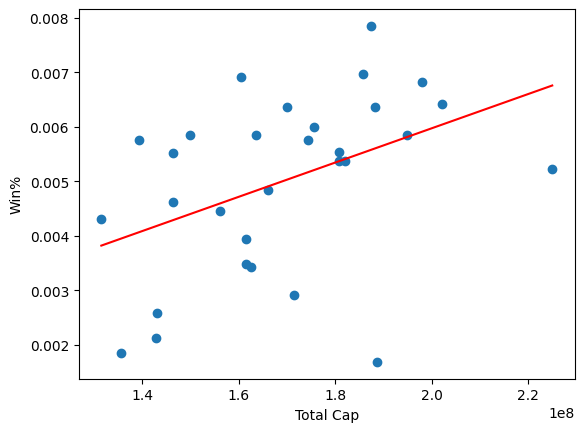

In [6]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming that "Win%" and "Total Cap" are columns in your dataframe
# Convert "Total Cap" to numeric, removing any non-numeric characters
df['Total Cap'] = df['Total Cap'].replace('[\$,]', '', regex=True).astype(float)

# Convert "Win%" to numeric, removing the '%' sign
df['Win%'] = df['Win%'].astype(str)
df['Win%'] = df['Win%'].str.rstrip('%').astype('float') / 100.0

# Define the dependent variable (y) and the independent variable (X)
y = df['Win%']
X = df['Total Cap']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Perform the regression
model = sm.OLS(y, X)
results = model.fit()

# Print out the statistics
print(results.summary())

plt.scatter(X['Total Cap'], y)
# Generate the prediction values along the line of best fit
y_pred = results.predict(X)
# Plot the regression line
plt.plot(X['Total Cap'], y_pred, color='red')
# Set the labels for the x and y axes
plt.xlabel('Total Cap')
plt.ylabel('Win%')
# Display the plot
plt.show()

In [7]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import pandas as pd

# Get player's ID
player_dict = players.get_players()

# Initialize an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Player', 'coef_PTS', 'coef_REB', 'coef_AST', 'intercept', 'R-squared'])

for player_name in df2['Name']:
    player = [player for player in player_dict if player['full_name'] == player_name]
    if not player:
        continue
    player_id = player[0]['id']

    # Get player's game log
    gamelog = playergamelog.PlayerGameLog(player_id)
    df = gamelog.get_data_frames()[0]

    # Select the stats for regression
    X = df[['PTS', 'REB', 'AST']].apply(pd.to_numeric, errors='coerce')
    y = pd.to_numeric(df2[df2['Name'] == player_name]['2023-24'], errors='coerce')  # replace '2023-24' with the salary column

# Combine X and y into a single DataFrame
    data = pd.concat([X, y], axis=1)

# Drop rows with NaN values
data = data.dropna()

# Separate X and y
X = data[['PTS', 'REB', 'AST']]
y = data['2023-24']  # replace '2023-24' with the salary column

# Check if X or y is empty
if X.empty or y.empty:
    continue

# Add a constant to the independent value
X = sm.add_constant(X)

# Conduct the ordinary least squares regression
model = sm.OLS(y, X)
results = model.fit()
    # Append the results to the results DataFrame
results_df = results_df.append({
        'Player': player_name,
        'coef_PTS': results.params['PTS'],
        'coef_REB': results.params['REB'],
        'coef_AST': results.params['AST'],
        'intercept': results.params['const'],
        'R-squared': results.rsquared
    }, ignore_index=True)

# Print out the results
print(results_df)

KeyboardInterrupt: 

Starting script...
Fetched webpage.
Parsed HTML content.
Found data table.
Extracted data.
Created DataFrame.
Converted contract value to numeric.


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\3972251735.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)


Fetched data for player Precious Achiuwa.
Fetched data for player Steven Adams.
Fetched data for player Bam Adebayo.
Fetched data for player Ochai Agbaji.
Fetched data for player Santi Aldama.
Fetched data for player Nickeil Alexander-Walker.
Fetched data for player Grayson Allen.
Fetched data for player Jarrett Allen.
Fetched data for player Jose Alvarado.
Fetched data for player Kyle Anderson.
Fetched data for player Giannis Antetokounmpo.
Fetched data for player Thanasis Antetokounmpo.
Fetched data for player Cole Anthony.
Fetched data for player OG Anunoby.
Fetched data for player Ryan Arcidiacono.
Fetched data for player Deni Avdija.
Fetched data for player Deandre Ayton.
Fetched data for player Marvin Bagley III.
Fetched data for player Patrick Baldwin Jr..
Fetched data for player LaMelo Ball.
Fetched data for player Lonzo Ball.
Fetched data for player Mo Bamba.
Fetched data for player Paolo Banchero.
Fetched data for player Desmond Bane.
Fetched data for player Dalano Banton.
Fe

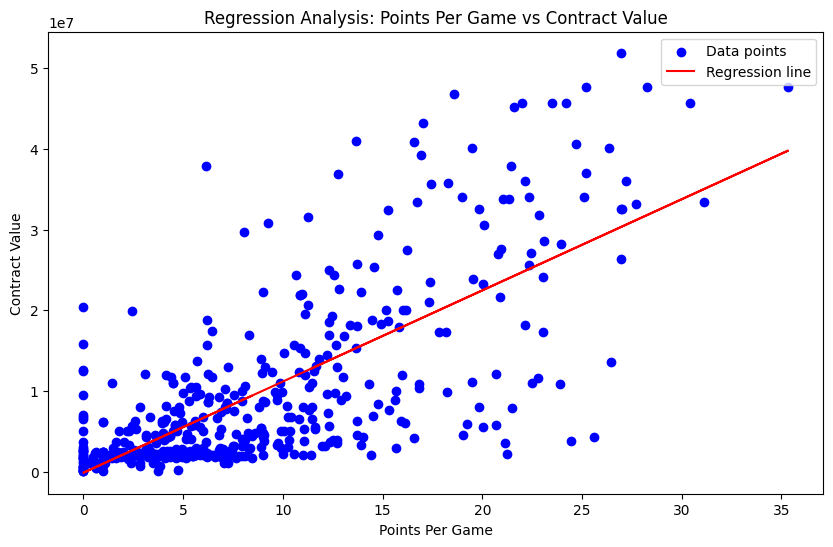

Script finished.


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import time

print("Starting script...")

# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)
print("Fetched webpage.")

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
print("Parsed HTML content.")

# Find the data table
table = soup.find('table', {'id': 'player-contracts'})
print("Found data table.")

# Extract data and convert it to a DataFrame
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
print("Extracted data.")

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Name", "Tm", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print("Created DataFrame.")

# Convert contract value to numeric
df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)
print("Converted contract value to numeric.")

# Fetch player's points per game data
player_stats = []
all_players = players.get_players()
for player in all_players:
    if player['full_name'] in df2['Name'].values:  # Only include players whose names match
        for i in range(5):  # Retry 5 times
            try:
                gamelog = playergamelog.PlayerGameLog(player_id=player['id']).get_data_frames()[0]
                ppg = gamelog['PTS'].mean()
                player_stats.append({'Name': player['full_name'], 'PPG': ppg})
                print(f"Fetched data for player {player['full_name']}.")
                break
            except requests.exceptions.Timeout:
                print(f"Timeout occurred for player {player['full_name']}. Retrying...")
                time.sleep(2)  # Wait for 2 seconds before retrying
        else:
            print(f"Failed to fetch data for player {player['full_name']} after 5 attempts.")

df1 = pd.DataFrame(player_stats)
print("Created DataFrame with player's points per game data.")

# Merge the contract data and points per game data
df = pd.merge(df1, df2, on='Name')
print("Merged data.")

# Check for NaN values in 'PPG'
print(df['PPG'].isna().sum())

# If there are NaN values, you might want to fill them with a specific value or drop the rows
# For example, to fill NaN values with 0:
df['PPG'].fillna(0, inplace=True)

# Check for infinite values in 'PPG'
print((df['PPG'] == float('inf')).sum())

# If there are infinite values, you might want to replace them with a specific value
# For example, to replace infinite values with a large number:
df['PPG'].replace(float('inf'), 9999999, inplace=True)

# Perform the regression analysis
X = df[['PPG']]
y = df['2023-24']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("Performed regression analysis.")

# Print the regression summary as a table
print(results.summary())

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(df['PPG'], df['2023-24'], color='blue', label='Data points')
plt.plot(df['PPG'], results.predict(X), color='red', label='Regression line')
plt.xlabel('Points Per Game')
plt.ylabel('Contract Value')
plt.title('Regression Analysis: Points Per Game vs Contract Value')
plt.legend()
plt.show()

print("Script finished.")

Starting script...
Fetched webpage.
Parsed HTML content.
Found data table.
Extracted data.
Created DataFrame.
Converted contract value to numeric.


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\2121959965.py:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)


Fetched data for player Precious Achiuwa.
Fetched data for player Steven Adams.
Fetched data for player Bam Adebayo.
Fetched data for player Ochai Agbaji.
Fetched data for player Santi Aldama.
Fetched data for player Nickeil Alexander-Walker.
Fetched data for player Grayson Allen.
Fetched data for player Jarrett Allen.
Fetched data for player Jose Alvarado.
Fetched data for player Kyle Anderson.
Fetched data for player Giannis Antetokounmpo.
Fetched data for player Thanasis Antetokounmpo.
Fetched data for player Cole Anthony.
Fetched data for player OG Anunoby.
Fetched data for player Ryan Arcidiacono.
Fetched data for player Deni Avdija.
Fetched data for player Deandre Ayton.
Fetched data for player Marvin Bagley III.
Fetched data for player Patrick Baldwin Jr..
Fetched data for player LaMelo Ball.
Fetched data for player Lonzo Ball.
Fetched data for player Mo Bamba.
Fetched data for player Paolo Banchero.
Fetched data for player Desmond Bane.
Fetched data for player Dalano Banton.
Fe

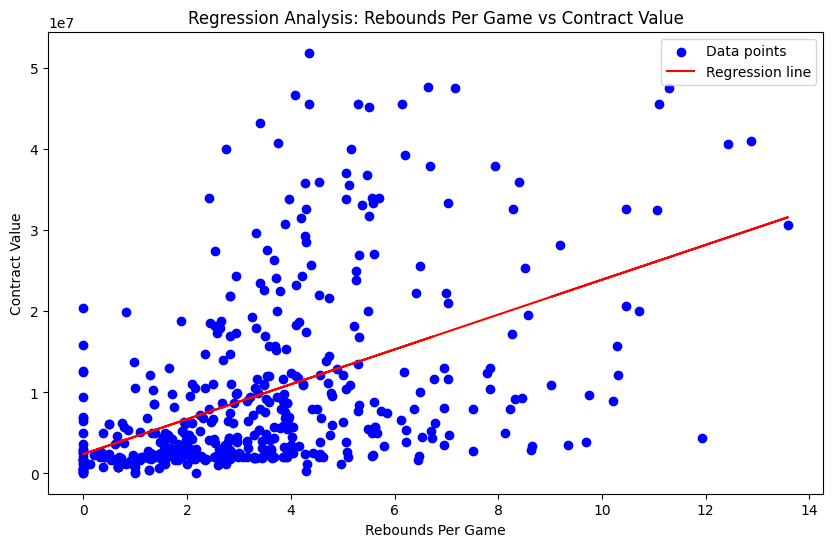

Script finished.


In [17]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import time

print("Starting script...")

# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)
print("Fetched webpage.")

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
print("Parsed HTML content.")

# Find the data table
table = soup.find('table', {'id': 'player-contracts'})
print("Found data table.")

# Extract data and convert it to a DataFrame
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
print("Extracted data.")

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Name", "Tm", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print("Created DataFrame.")

# Convert contract value to numeric
df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)
print("Converted contract value to numeric.")

# Fetch player's points per game data
player_stats = []
all_players = players.get_players()
for player in all_players:
    if player['full_name'] in df2['Name'].values:  # Only include players whose names match
        for i in range(5):  # Retry 5 times
            try:
                gamelog = playergamelog.PlayerGameLog(player_id=player['id']).get_data_frames()[0]
                rpg = gamelog['REB'].mean()  # Use 'REB' for rebounds
                player_stats.append({'Name': player['full_name'], 'RPG': rpg})  # Use 'RPG' for rebounds per game
                print(f"Fetched data for player {player['full_name']}.")
                break
            except requests.exceptions.Timeout:
                print(f"Timeout occurred for player {player['full_name']}. Retrying...")
                time.sleep(2)  # Wait for 2 seconds before retrying
        else:
            print(f"Failed to fetch data for player {player['full_name']} after 5 attempts.")

df1 = pd.DataFrame(player_stats)
print("Created DataFrame with player's rebounds per game data.")

# Merge the contract data and points per game data
df = pd.merge(df1, df2, on='Name')
print("Merged data.")

# Check for NaN values in 'RPG'
print(df['RPG'].isna().sum())

# If there are NaN values, you might want to fill them with a specific value or drop the rows
# For example, to fill NaN values with 0:
df['RPG'].fillna(0, inplace=True)

# Check for infinite values in 'RPG'
print((df['RPG'] == float('inf')).sum())

# If there are infinite values, you might want to replace them with a specific value
# For example, to replace infinite values with a large number:
df['RPG'].replace(float('inf'), 9999999, inplace=True)

# Perform the regression analysis
X = df[['RPG']]  # Use 'RPG' for rebounds per game
y = df['2023-24']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("Performed regression analysis.")

# Print the regression summary as a table
print(str(results.summary()))

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(df['RPG'], df['2023-24'], color='blue', label='Data points')  # Use 'RPG' for rebounds per game
plt.plot(df['RPG'], results.predict(X), color='red', label='Regression line')  # Use 'RPG' for rebounds per game
plt.xlabel('Rebounds Per Game')  # Use 'Rebounds Per Game' for x-axis label
plt.ylabel('Contract Value')
plt.title('Regression Analysis: Rebounds Per Game vs Contract Value')  # Use 'Rebounds Per Game' for title
plt.legend()
plt.show()

print("Script finished.")

Starting script...


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\316125301.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)  # Display the full content of each field


Fetched webpage.
Parsed HTML content.
Found data table.
Extracted data.
Created DataFrame.
Converted contract value to numeric.


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\316125301.py:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)


Fetched data for player Precious Achiuwa.
Fetched data for player Steven Adams.
Fetched data for player Bam Adebayo.
Fetched data for player Ochai Agbaji.
Fetched data for player Santi Aldama.
Fetched data for player Nickeil Alexander-Walker.
Fetched data for player Grayson Allen.
Fetched data for player Jarrett Allen.
Fetched data for player Jose Alvarado.
Fetched data for player Kyle Anderson.
Fetched data for player Giannis Antetokounmpo.
Fetched data for player Thanasis Antetokounmpo.
Fetched data for player Cole Anthony.
Fetched data for player OG Anunoby.
Fetched data for player Ryan Arcidiacono.
Fetched data for player Deni Avdija.
Fetched data for player Deandre Ayton.
Fetched data for player Marvin Bagley III.
Fetched data for player Patrick Baldwin Jr..
Fetched data for player LaMelo Ball.
Fetched data for player Lonzo Ball.
Fetched data for player Mo Bamba.
Fetched data for player Paolo Banchero.
Fetched data for player Desmond Bane.
Fetched data for player Dalano Banton.
Fe

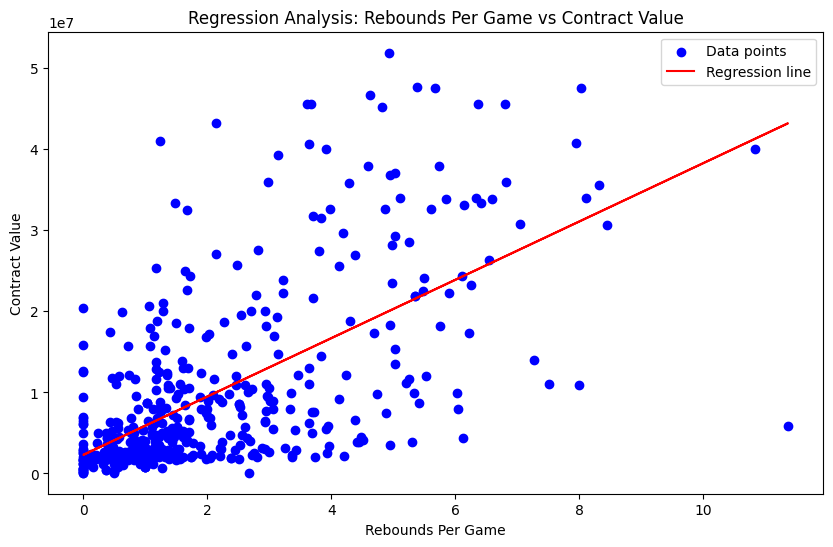

Script finished.


In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import time

print("Starting script...")
# At the beginning of your script
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to next line
pd.set_option('max_colwidth', -1)  # Display the full content of each field

# ... rest of your code ...
# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)
print("Fetched webpage.")

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
print("Parsed HTML content.")

# Find the data table
table = soup.find('table', {'id': 'player-contracts'})
print("Found data table.")

# Extract data and convert it to a DataFrame
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
print("Extracted data.")

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Name", "Tm", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print("Created DataFrame.")

# Convert contract value to numeric
df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)
print("Converted contract value to numeric.")

# Fetch player's points per game data
player_stats = []
all_players = players.get_players()
for player in all_players:
    if player['full_name'] in df2['Name'].values:  # Only include players whose names match
        for i in range(5):  # Retry 5 times
            try:
                gamelog = playergamelog.PlayerGameLog(player_id=player['id']).get_data_frames()[0]
                apg = gamelog['AST'].mean()  # Use 'REB' for rebounds
                player_stats.append({'Name': player['full_name'], 'APG': apg})  # Use 'RPG' for rebounds per game
                print(f"Fetched data for player {player['full_name']}.")
                break
            except requests.exceptions.Timeout:
                print(f"Timeout occurred for player {player['full_name']}. Retrying...")
                time.sleep(2)  # Wait for 2 seconds before retrying
        else:
            print(f"Failed to fetch data for player {player['full_name']} after 5 attempts.")

df1 = pd.DataFrame(player_stats)
print("Created DataFrame with player's rebounds per game data.")

# Merge the contract data and points per game data
df = pd.merge(df1, df2, on='Name')
print("Merged data.")

# Check for NaN values in 'RPG'
print(df['APG'].isna().sum())

# If there are NaN values, you might want to fill them with a specific value or drop the rows
# For example, to fill NaN values with 0:
df['APG'].fillna(0, inplace=True)

# Check for infinite values in 'RPG'
print((df['APG'] == float('inf')).sum())

# If there are infinite values, you might want to replace them with a specific value
# For example, to replace infinite values with a large number:
df['APG'].replace(float('inf'), 9999999, inplace=True)

# Perform the regression analysis
X = df[['APG']]  # Use 'RPG' for rebounds per game
y = df['2023-24']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("Performed regression analysis.")

# Print the regression summary as a table
print(str(results.summary()))

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(df['APG'], df['2023-24'], color='blue', label='Data points')  # Use 'RPG' for rebounds per game
plt.plot(df['APG'], results.predict(X), color='red', label='Regression line')  # Use 'RPG' for rebounds per game
plt.xlabel('Rebounds Per Game')  # Use 'Rebounds Per Game' for x-axis label
plt.ylabel('Contract Value')
plt.title('Regression Analysis: Rebounds Per Game vs Contract Value')  # Use 'Rebounds Per Game' for title
plt.legend()
plt.show()

print("Script finished.")

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog
import statsmodels.api as sm
import time

print("Starting script...")
# At the beginning of your script
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping to next line
pd.set_option('max_colwidth', -1)  # Display the full content of each field

# ... rest of your code ...
# Fetch the webpage
url = "https://www.basketball-reference.com/contracts/players.html"
response = requests.get(url)
print("Fetched webpage.")

# Parse the HTML content
soup = BeautifulSoup(response.content, 'html.parser')
print("Parsed HTML content.")

# Find the data table
table = soup.find('table', {'id': 'player-contracts'})
print("Found data table.")

# Extract data and convert it to a DataFrame
data = []
rows = table.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele])
print("Extracted data.")

df2 = pd.DataFrame(data)
df2.replace('None', None, inplace=True)
df2.dropna(how='all', inplace=True)
headers = ["Name", "Tm", "2023-24", "2024-25", "2025-26", "2026-27", "2027-28", "2028-29", "2029-30"]
df2.columns = headers
print("Created DataFrame.")

# Convert contract value to numeric
df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)
print("Converted contract value to numeric.")

# Fetch player's points per game data
player_stats = []
all_players = players.get_players()
for player in all_players:
    if player['full_name'] in df2['Name'].values:  # Only include players whose names match
        for i in range(5):  # Retry 5 times
            try:
                gamelog = playergamelog.PlayerGameLog(player_id=player['id']).get_data_frames()[0]
                ppg = gamelog['PTS'].mean()  # Points per game
                rpg = gamelog['REB'].mean()  # Rebounds per game
                apg = gamelog['AST'].mean()  # Assists per game
                player_stats.append({'Name': player['full_name'], 'PPG': ppg, 'RPG': rpg, 'APG': apg})
                print(f"Fetched data for player {player['full_name']}.")
                break
            except requests.exceptions.Timeout:
                print(f"Timeout occurred for player {player['full_name']}. Retrying...")
                time.sleep(2)  # Wait for 2 seconds before retrying
        else:
            print(f"Failed to fetch data for player {player['full_name']} after 5 attempts.")

df1 = pd.DataFrame(player_stats)
print("Created DataFrame with player's rebounds per game data.")

# Merge the contract data and points per game data
df = pd.merge(df1, df2, on='Name')
print("Merged data.")

# Check for NaN values in 'RPG'
print(df[['PPG', 'RPG', 'APG']].isna().sum())

# If there are NaN values, you might want to fill them with a specific value or drop the rows
# For example, to fill NaN values with 0:
df[['PPG', 'RPG', 'APG']].fillna(0, inplace=True)
print((df[['PPG', 'RPG', 'APG']] == float('inf')).sum())
df[['PPG', 'RPG', 'APG']].replace(float('inf'), 9999999, inplace=True)

# Perform the regression analysis
X = df[['PPG', 'RPG', 'APG']]  # Include all variables
y = df['2023-24']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print("Performed regression analysis.")

# Print the regression summary as a table
print(str(results.summary()))

# Plot the regression
plt.figure(figsize=(10, 6))
plt.scatter(df['APG'], df['2023-24'], color='blue', label='Data points')  # Use 'RPG' for rebounds per game
plt.plot(df['APG'], results.predict(X), color='red', label='Regression line')  # Use 'RPG' for rebounds per game
plt.xlabel('PPG APG RPG Per Game')  # Use 'Rebounds Per Game' for x-axis label
plt.ylabel('Contract Value')
plt.title('Regression Analysis: Rebounds Per Game vs Contract Value')  # Use 'Rebounds Per Game' for title
plt.legend()
plt.show()

print("Script finished.")

Starting script...


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\1474142767.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)  # Display the full content of each field


Fetched webpage.
Parsed HTML content.
Found data table.
Extracted data.
Created DataFrame.
Converted contract value to numeric.


C:\Users\bober\AppData\Local\Temp\ipykernel_7284\1474142767.py:46: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df2['2023-24'] = df2['2023-24'].str.replace('$', '').str.replace(',', '').astype(float)


Fetched data for player Precious Achiuwa.
Fetched data for player Steven Adams.
Fetched data for player Bam Adebayo.
Fetched data for player Ochai Agbaji.
Fetched data for player Santi Aldama.
Fetched data for player Nickeil Alexander-Walker.
Fetched data for player Grayson Allen.
Fetched data for player Jarrett Allen.
Fetched data for player Jose Alvarado.
Fetched data for player Kyle Anderson.
Fetched data for player Giannis Antetokounmpo.
Fetched data for player Thanasis Antetokounmpo.
Fetched data for player Cole Anthony.
Fetched data for player OG Anunoby.
Fetched data for player Ryan Arcidiacono.
Fetched data for player Deni Avdija.
Fetched data for player Deandre Ayton.
Fetched data for player Marvin Bagley III.
Fetched data for player Patrick Baldwin Jr..
Fetched data for player LaMelo Ball.
Fetched data for player Lonzo Ball.
Fetched data for player Mo Bamba.
Fetched data for player Paolo Banchero.
Fetched data for player Desmond Bane.
Fetched data for player Dalano Banton.
Fe

KeyError: ('PPG', 'RPG', 'APG')

HI
Hiv kdjvdofisljgdghuekjdjkd

In [90]:
#raptor source: https://neilpaine.substack.com/p/nba-estimated-raptor-player-ratings
import pandas as pd

In [189]:
raptor = pd.read_csv("dataset2.csv")
newcolumns = [0, 1, 2, 3, 8]
raptor = raptor.iloc[:,newcolumns]
raptor = raptor.drop(0)
raptor = raptor.rename(columns={'Unnamed: 0': 'Player', 'Unnamed: 1':'Name','Unnamed: 2':'Team', 'Unnamed: 3':'Position(s)', 'Unnamed: 8':'Total RAPTOR'})
raptor


,Player,Name,Team,Position(s),Total RAPTOR
1,Markquis Nowell,24,TOR,SG,37.74899093
2,Hamidou Diallo,25,WAS,SG,26.42653133
3,Henri Drell,23,CHI,SF,25.36624168
4,Drew Peterson,24,BOS,PF,23.67703879
5,Adama Sanogo,21,CHI,PF,19.42261036
...,...,...,...,...,...
553,Dmytro Skapintsev,25,NYK,C,-25.4
554,Alondes Williams,24,MIA,SG,-26.7508189
555,Quenton Jackson,25,IND,PG,-26.76915289
556,Joshua Primo,21,LAC,SG,-27.14852305


In [262]:
lebron = pd.read_csv('lebron.csv')
index = range(1, len(lebron) + 1)
lebron.index = index
newcolumns = [0, 2, 3, 4, 5, 6, 7]
lebron = lebron.iloc[:,newcolumns]
lebron = lebron.drop(535)
lebron

,Player,Team,Offensive Archetype,Minutes,Pos,Age,LEBRON
1,Nikola Jokic,DEN,Post Scorer,"1,584",C,28,6.56
2,Giannis Antetokounmpo,MIL,Shot Creator,"1,618",PF,29,6.16
3,Joel Embiid,PHI,Shot Creator,"1,157",C,29,5.80
4,Shai Gilgeous-Alexander,OKC,Shot Creator,"1,615",PG,25,5.70
5,Luka Doncic,DAL,Shot Creator,"1,499",PG,24,5.46
...,...,...,...,...,...,...,...
530,Scoot Henderson,POR,Primary Ball Handler,"1,024",PG,19,-3.60
531,Ish Smith,CHO,Primary Ball Handler,649,PG,35,-3.65
532,Nick Smith Jr.,CHO,Movement Shooter,468,SG,19,-3.76
533,Bryce McGowens,CHO,Movement Shooter,592,SG,21,-3.87


In [190]:
#win share and player efficiency rating
import requests
import lxml.html as lx
url = 'https://www.basketball-reference.com/leagues/NBA_2024_advanced.html'
response = requests.get(url)
html = lx.fromstring(response.text)
tables = html.xpath('//table')

# Iterate over each table element
for table in tables:
    dataframe = []
    for row in table.xpath('.//tr'):
        # Extract data from each cell in the row
        row_data = [cell.text_content().strip() for cell in row.xpath('.//td')]
        dataframe.append(row_data)
rows = []
for row_data in dataframe:
    rows.append(row_data)
df = pd.DataFrame(rows, columns=columns)
df = df.drop(0)
df = df.drop_duplicates(subset=['Player'], keep='first')
index = range(1, len(df) + 1)
df.index = index
newcolumns = [0, 1, 2, 3, 6, 21]
df = df.iloc[:,newcolumns]
df

,Player,Pos,Age,Team,PER,WS
1,Precious Achiuwa,PF-C,24,TOT,14.8,3.0
2,Bam Adebayo,C,26,MIA,19.6,5.4
3,Ochai Agbaji,SG,23,TOT,7.4,0.2
4,Santi Aldama,PF,23,MEM,12.7,1.8
5,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5
...,...,...,...,...,...,...
554,Thaddeus Young,PF,35,TOT,15.8,1.1
555,Trae Young,PG,25,ATL,20.2,4.5
556,Omer Yurtseven,C,25,UTA,14.0,0.4
557,Cody Zeller,C,31,NOP,12.8,0.8


In [208]:
merge1 = pd.merge(df, raptor, on='Player', how='inner')

In [233]:
from fuzzywuzzy import process
merge2 = pd.merge(merge1, lebron, 
                           left_on=merge1['Player'].apply(lambda x: process.extractOne(x, lebron['Player'])[0]), 
                           right_on='Player', 
                           how='inner')

merge2

,Player,Player_x,Pos_x,Age_x,Team_x,PER,WS,Name,Team_y,Position(s),Total RAPTOR,Player_y,Team,Offensive Archetype,Minutes,Pos_y,Age_y,LEBRON
0,Precious Achiuwa,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,24,NYK,TOR,-2.069791285,Precious Achiuwa,TOR/NYK,Athletic Finisher,727,C,24,-1.53
1,Bam Adebayo,Bam Adebayo,C,26,MIA,19.6,5.4,26,MIA,C,0.376229912,Bam Adebayo,MIA,Shot Creator,"1,324",C,26,1.94
2,Ochai Agbaji,Ochai Agbaji,SG,23,TOT,7.4,0.2,23,UTA,TOR,-0.824980395,Ochai Agbaji,UTA,Movement Shooter,976,SG,23,-2.59
3,Santi Aldama,Santi Aldama,PF,23,MEM,12.7,1.8,23,MEM,PF,-1.725579779,Santi Aldama,MEM,Stationary Shooter,857,PF,23,-0.93
4,Nickeil Alexander-Walker,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,25,MIN,SG,0.777527162,Nickeil Alexander-Walker,MIN,Stationary Shooter,"1,105",SG,25,-1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Thaddeus Young,Thaddeus Young,PF,35,TOT,15.8,1.1,35,TOR,PHO,0.004103202,Thaddeus Young,TOR,Roll + Cut Big,277,PF,35,-0.63
551,Trae Young,Trae Young,PG,25,ATL,20.2,4.5,25,ATL,PG,0.861452584,Trae Young,ATL,Primary Ball Handler,"1,526",PG,25,1.65
552,Omer Yurtseven,Omer Yurtseven,C,25,UTA,14.0,0.4,25,UTA,C,-6.375909454,Omer Yurtseven,UTA,Roll + Cut Big,265,C,25,-1.28
553,Cody Zeller,Cody Zeller,C,31,NOP,12.8,0.8,31,NOP,C,-2.559829809,Cody Zeller,NOP,Roll + Cut Big,275,C,31,-1.04


In [234]:
newcolumns = [0, 2, 3, 4, 5, 6, 8, 10, 13, 14, 17]
merge2 = merge2.iloc[:,newcolumns]
merge2 = merge2.drop(columns=['Team_y'])
merge2

,Player,Pos_x,Age_x,Team_x,PER,WS,Total RAPTOR,Offensive Archetype,Minutes,LEBRON
0,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,-2.069791285,Athletic Finisher,727,-1.53
1,Bam Adebayo,C,26,MIA,19.6,5.4,0.376229912,Shot Creator,"1,324",1.94
2,Ochai Agbaji,SG,23,TOT,7.4,0.2,-0.824980395,Movement Shooter,976,-2.59
3,Santi Aldama,PF,23,MEM,12.7,1.8,-1.725579779,Stationary Shooter,857,-0.93
4,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,0.777527162,Stationary Shooter,"1,105",-1.51
...,...,...,...,...,...,...,...,...,...,...
550,Thaddeus Young,PF,35,TOT,15.8,1.1,0.004103202,Roll + Cut Big,277,-0.63
551,Trae Young,PG,25,ATL,20.2,4.5,0.861452584,Primary Ball Handler,"1,526",1.65
552,Omer Yurtseven,C,25,UTA,14.0,0.4,-6.375909454,Roll + Cut Big,265,-1.28
553,Cody Zeller,C,31,NOP,12.8,0.8,-2.559829809,Roll + Cut Big,275,-1.04


In [263]:
merge2 = merge2.rename(columns={'Pos_x': 'Position', 'Age_x':'Age','Team_x':'Team'})
index = range(1, len(merge2) + 1)
merge2.index = index
merge2

,Player,Position,Age,Team,PER,WS,Total RAPTOR,Offensive Archetype,Minutes,LEBRON
1,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,-2.069791285,Athletic Finisher,727,-1.53
2,Bam Adebayo,C,26,MIA,19.6,5.4,0.376229912,Shot Creator,"1,324",1.94
3,Ochai Agbaji,SG,23,TOT,7.4,0.2,-0.824980395,Movement Shooter,976,-2.59
4,Santi Aldama,PF,23,MEM,12.7,1.8,-1.725579779,Stationary Shooter,857,-0.93
5,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,0.777527162,Stationary Shooter,"1,105",-1.51
...,...,...,...,...,...,...,...,...,...,...
551,Thaddeus Young,PF,35,TOT,15.8,1.1,0.004103202,Roll + Cut Big,277,-0.63
552,Trae Young,PG,25,ATL,20.2,4.5,0.861452584,Primary Ball Handler,"1,526",1.65
553,Omer Yurtseven,C,25,UTA,14.0,0.4,-6.375909454,Roll + Cut Big,265,-1.28
554,Cody Zeller,C,31,NOP,12.8,0.8,-2.559829809,Roll + Cut Big,275,-1.04


In [265]:
merge_copy = merge2.copy() 
merge_copy['Player'] = merge_copy['Player'].apply(lambda x: process.extractOne(x, df2['Player'])[0])
table = pd.merge(merge_copy, df2, on='Player', how='inner')
table

,Player,Position,Age,Team_x,PER,WS,Total RAPTOR,Offensive Archetype,Minutes,LEBRON,Team_y,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30
0,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,-2.069791285,Athletic Finisher,727,-1.53,NYK,"$4,379,527","$4,379,527",None,None,None,None,None
1,Bam Adebayo,C,26,MIA,19.6,5.4,0.376229912,Shot Creator,"1,324",1.94,MIA,"$32,600,060","$34,848,340","$37,096,620","$104,545,020",None,None,None
2,Ochai Agbaji,SG,23,TOT,7.4,0.2,-0.824980395,Movement Shooter,976,-2.59,TOR,"$4,114,200","$4,310,280","$6,383,525","$8,424,480",None,None,None
3,Santi Aldama,PF,23,MEM,12.7,1.8,-1.725579779,Stationary Shooter,857,-0.93,MEM,"$2,194,200","$3,960,531","$6,154,731",None,None,None,None
4,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,0.777527162,Stationary Shooter,"1,105",-1.51,MIN,"$4,687,500","$4,312,500","$9,000,000",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,Thaddeus Young,PF,35,TOT,15.8,1.1,0.004103202,Roll + Cut Big,277,-0.63,BRK,"$8,000,000","$8,000,000",None,None,None,None,None
571,Trae Young,PG,25,ATL,20.2,4.5,0.861452584,Primary Ball Handler,"1,526",1.65,ATL,"$40,064,220","$43,031,940","$45,999,660","$48,967,380","$178,063,200",None,None
572,Omer Yurtseven,C,25,UTA,14.0,0.4,-6.375909454,Roll + Cut Big,265,-1.28,UTA,"$2,800,000","$2,660,000","$5,460,000",None,None,None,None
573,Cody Zeller,C,31,NOP,12.8,0.8,-2.559829809,Roll + Cut Big,275,-1.04,NOP,"$2,019,706","$2,019,706",None,None,None,None,None


In [267]:
table = table.drop_duplicates(subset='Player')
index = range(1, len(table) + 1)
table.index = index
table
#explain why there are missing values

,Player,Position,Age,Team_x,PER,WS,Total RAPTOR,Offensive Archetype,Minutes,LEBRON,Team_y,2023-24,2024-25,2025-26,2026-27,2027-28,2028-29,2029-30
1,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,-2.069791285,Athletic Finisher,727,-1.53,NYK,"$4,379,527","$4,379,527",None,None,None,None,None
2,Bam Adebayo,C,26,MIA,19.6,5.4,0.376229912,Shot Creator,"1,324",1.94,MIA,"$32,600,060","$34,848,340","$37,096,620","$104,545,020",None,None,None
3,Ochai Agbaji,SG,23,TOT,7.4,0.2,-0.824980395,Movement Shooter,976,-2.59,TOR,"$4,114,200","$4,310,280","$6,383,525","$8,424,480",None,None,None
4,Santi Aldama,PF,23,MEM,12.7,1.8,-1.725579779,Stationary Shooter,857,-0.93,MEM,"$2,194,200","$3,960,531","$6,154,731",None,None,None,None
5,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,0.777527162,Stationary Shooter,"1,105",-1.51,MIN,"$4,687,500","$4,312,500","$9,000,000",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,Thaddeus Young,PF,35,TOT,15.8,1.1,0.004103202,Roll + Cut Big,277,-0.63,BRK,"$8,000,000","$8,000,000",None,None,None,None,None
452,Trae Young,PG,25,ATL,20.2,4.5,0.861452584,Primary Ball Handler,"1,526",1.65,ATL,"$40,064,220","$43,031,940","$45,999,660","$48,967,380","$178,063,200",None,None
453,Omer Yurtseven,C,25,UTA,14.0,0.4,-6.375909454,Roll + Cut Big,265,-1.28,UTA,"$2,800,000","$2,660,000","$5,460,000",None,None,None,None
454,Cody Zeller,C,31,NOP,12.8,0.8,-2.559829809,Roll + Cut Big,275,-1.04,NOP,"$2,019,706","$2,019,706",None,None,None,None,None


In [271]:
columns = ['Team_y', '2024-25', '2025-26', '2026-27', '2027-28', '2028-29', '2029-30']
table = table.drop(columns=columns)
table


KeyError: "['Team_y', '2024-25', '2025-26', '2026-27', '2027-28', '2028-29', '2029-30'] not found in axis"

In [272]:
table = table.rename(columns={'Team_x': 'Team'})
table

,Player,Position,Age,Team,PER,WS,Total RAPTOR,Offensive Archetype,Minutes,LEBRON,2023-24
1,Precious Achiuwa,PF-C,24,TOT,14.8,3.0,-2.069791285,Athletic Finisher,727,-1.53,"$4,379,527"
2,Bam Adebayo,C,26,MIA,19.6,5.4,0.376229912,Shot Creator,"1,324",1.94,"$32,600,060"
3,Ochai Agbaji,SG,23,TOT,7.4,0.2,-0.824980395,Movement Shooter,976,-2.59,"$4,114,200"
4,Santi Aldama,PF,23,MEM,12.7,1.8,-1.725579779,Stationary Shooter,857,-0.93,"$2,194,200"
5,Nickeil Alexander-Walker,SG,25,MIN,10.6,3.5,0.777527162,Stationary Shooter,"1,105",-1.51,"$4,687,500"
...,...,...,...,...,...,...,...,...,...,...,...
451,Thaddeus Young,PF,35,TOT,15.8,1.1,0.004103202,Roll + Cut Big,277,-0.63,"$8,000,000"
452,Trae Young,PG,25,ATL,20.2,4.5,0.861452584,Primary Ball Handler,"1,526",1.65,"$40,064,220"
453,Omer Yurtseven,C,25,UTA,14.0,0.4,-6.375909454,Roll + Cut Big,265,-1.28,"$2,800,000"
454,Cody Zeller,C,31,NOP,12.8,0.8,-2.559829809,Roll + Cut Big,275,-1.04,"$2,019,706"
